In [1]:
import pandas as pd

In [4]:
#anime_list_raw = pd.read_csv('myanimelist/AnimeList.csv')
#user_anime_list_raw = pd.read_csv('myanimelist/UserAnimeList.csv')
#user_list_raw = pd.read_csv('myanimelist/UserList.csv')

In [3]:
print(anime_list_raw.columns)

Index([u'anime_id', u'title', u'title_english', u'title_japanese',
       u'title_synonyms', u'image_url', u'type', u'source', u'episodes',
       u'status', u'airing', u'aired_string', u'aired', u'duration', u'rating',
       u'score', u'scored_by', u'rank', u'popularity', u'members',
       u'favorites', u'background', u'premiered', u'broadcast', u'related',
       u'producer', u'licensor', u'studio', u'genre', u'opening_theme',
       u'ending_theme'],
      dtype='object')


In [2]:
UsersDF = pd.read_csv('myanimelist/users_cleaned.csv')
AnimesDF = pd.read_csv('myanimelist/anime_cleaned.csv')
ScoresDF = pd.read_csv('myanimelist/animelists_cleaned.csv')

In [3]:
AnimesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
anime_id           6668 non-null int64
title              6668 non-null object
title_english      3438 non-null object
title_japanese     6663 non-null object
title_synonyms     4481 non-null object
image_url          6666 non-null object
type               6668 non-null object
source             6668 non-null object
episodes           6668 non-null int64
status             6668 non-null object
airing             6668 non-null bool
aired_string       6668 non-null object
aired              6668 non-null object
duration           6668 non-null object
rating             6668 non-null object
score              6668 non-null float64
scored_by          6668 non-null int64
rank               6312 non-null float64
popularity         6668 non-null int64
members            6668 non-null int64
favorites          6668 non-null int64
background         813 non-null object
premiered          2

In [4]:
UsersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
username                    108710 non-null object
user_id                     108711 non-null int64
user_watching               108711 non-null int64
user_completed              108711 non-null int64
user_onhold                 108711 non-null int64
user_dropped                108711 non-null int64
user_plantowatch            108711 non-null int64
user_days_spent_watching    108711 non-null float64
gender                      108711 non-null object
location                    108706 non-null object
birth_date                  108711 non-null object
access_rank                 0 non-null float64
join_date                   108711 non-null object
last_online                 108711 non-null object
stats_mean_score            108711 non-null float64
stats_rewatched             108711 non-null float64
stats_episodes              108711 non-null int64
dtypes: float64(4), int64(7), 

In [5]:
ScoresDF.info()
#only take the columns that are important for the recommendation system
ScoresDF = ScoresDF[['username', 'anime_id', 'my_score', 'my_status']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
username               object
anime_id               int64
my_watched_episodes    int64
my_start_date          object
my_finish_date         object
my_score               int64
my_status              int64
my_rewatching          float64
my_rewatching_ep       int64
my_last_updated        object
my_tags                object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [13]:
#Counting how many relevant scores each user have done, resetting the index (so the series could become a DF again) and changing the column names
UsersAndScores = ScoresDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})

In [26]:
UsersAndScores.sort_values(by=['animes_rated'], inplace=True)
print("\nAll users and no. of animes rated:\n")
print(UsersAndScores.info())
print(UsersAndScores.min())
print(UsersAndScores.max())
print(UsersAndScores['animes_rated'].mean())
animes_rated_user_count=UsersAndScores.groupby('animes_rated').size().reset_index(name='no of users who made this many ratings')
print("\nNo of users grouped by no of animes rate:\n")
print(animes_rated_user_count.head())
animes_rated_user_count.tail()


All users and no. of animes rated:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108709 entries, 108708 to 0
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None
username        ----phoebelyn
animes_rated                1
dtype: object
username        zzzzz-chan
animes_rated          6536
dtype: object
287.7755015684074

No of users grouped by no of animes rate:

   animes_rated  no of users who made this many ratings
0             1                                     248
1             2                                     425
2             3                                     516
3             4                                     504
4             5                                     517


,animes_rated,no of users who made this many ratings
2135,5234,1
2136,5912,1
2137,5923,1
2138,6367,1
2139,6536,1


In [20]:
UsersWith100plusRatings=UsersAndScores.loc[UsersAndScores['animes_rated'] >= 100]
print("\nUsers who rated 100+ animes:\n")
print(UsersWith100plusRatings.head())
print(UsersWith100plusRatings.info())
print(UsersWith100plusRatings.describe())


All users and no. of animes rated:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108709 entries, 108708 to 0
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None

Users who rated 100+ animes:

          username  animes_rated
76884  ConnorCrook           100
76882     Snake5k6           100
76881     Fawkes22           100
76873      nassbar           100
76885          iXp           100
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77049 entries, 76884 to 0
Data columns (total 2 columns):
username        77049 non-null object
animes_rated    77049 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
       animes_rated
count  77049.000000
mean     387.242768
std      323.903729
min      100.000000
25%      180.000000
50%      291.000000
75%      481.000000
max     6536.000000


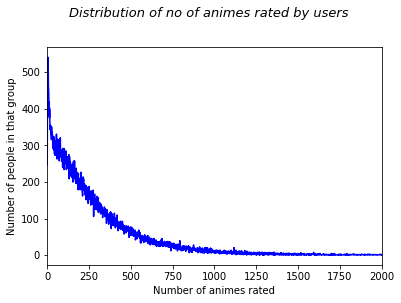

In [11]:
import matplotlib.pyplot as plt
plt.suptitle("Distribution of no of animes rated by users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'counts', data = animes_rated_user_count, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

In [28]:
# merge user info and usersAndScore(no of animes they rated) tables
UserInfoAndScores = pd.merge(UsersAndScores, UsersDF, left_on = 'username', right_on = 'username', how = 'inner')

In [29]:
UserInfoAndScores.head()

,username,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,kit_kat,1,253267,0,1,0,0,0,0.766667,Female,on my but ^-^,1997-04-27 00:00:00,NaN,2009-10-31 00:00:00,2009-10-31 17:28:00,9.0,3.0,46
1,kekorita89,1,58171,0,1,0,0,0,1.215278,Female,"capital federal, buenos aires",1991-09-08 00:00:00,NaN,2008-05-04 00:00:00,2010-03-09 13:20:00,10.0,3.0,70
2,KandaTehExorcist,1,292484,1,0,0,0,0,0.814583,Male,Japan,1991-12-12 00:00:00,NaN,2010-02-09 00:00:00,2010-06-13 10:41:00,10.0,0.0,51
3,ibiiilll,1,3291553,0,1,0,0,0,0.590972,Female,Jakarta,1992-12-14 00:00:00,NaN,2013-10-25 00:00:00,2013-10-30 01:25:00,9.0,0.0,37
4,IchigoFruit17,1,241866,0,1,0,0,0,0.850000,Female,"Beirut, Lebanon",1992-03-10 00:00:00,NaN,2009-10-03 00:00:00,2010-02-08 10:52:00,8.0,3.0,51


In [34]:
#Counting how many relevant scores each anime has, resetting the index (so the series could become a DF again) and changing the column names
RatedsPerAnime = ScoresDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
RatedsPerAnime.head()

,anime_id,number_of_users
0,1535,81332
1,1575,67721
2,226,64486
3,5114,63649
4,4224,63278


In [35]:
#Grouping users whom had the same amount of animes rated
AnimeRatedsAggregated = RatedsPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "no_of_anime_rated", "index": "number_of_users"}).sort_values(by=['number_of_users'])
AnimeRatedsAggregated.head(n = 30)

,number_of_users,no_of_anime_rated
443,1,3
24,2,11
26,3,11
21,4,12
6,5,16
17,6,13
10,7,14
8,8,16
1,9,22
2,10,21


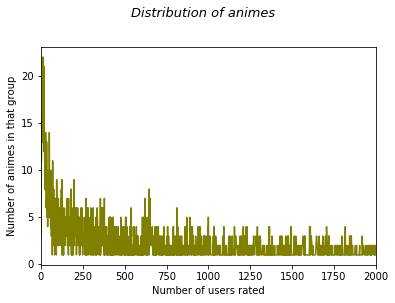

In [36]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("Distribution of animes", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'no_of_anime_rated', data = AnimeRatedsAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()